In [1]:
# імпорт бібліотек
import cv2
import tkinter as tk
import os
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np

## Теорія

`Детектор меж Кенні:`

- Опис: Використовує гаусівське згладжування та визначення градієнта для виявлення меж.
- Переваги: Добре працює при виявленні тонких контурів.
- Недоліки: Чутливий до шуму.

`Оператор Лапласіана:`

- Опис: Використовує дискретний Лапласіан для визначення зміни яскравості.
- Переваги: Ефективний при виділенні областей з великою зміною градієнту.
- Недоліки: Чутливий до шуму, може призводити до подвійних контурів.

`Оператор Собеля:`

- Опис: Використовує фільтри Собеля для виділення горизонтальних та вертикальних змін яскравості.
- Переваги: Ефективний при виділенні вертикальних або горизонтальних контурів.
- Недоліки: Чутливий до шуму.

`Оператор Прюїтта:`

- Опис: Схожий на оператор Собеля, але використовує інші ядра для обчислення градієнту.
- Переваги: Володіє схожими перевагами та недоліками, як і оператор Собеля.

`Оператор Робертса:`

- Опис: Використовує два 2x2 ядра для виділення градієнту.
- Переваги: Простий у реалізації та швидкий.
- Недоліки: Менш ефективний при роботі з товстими або деякою кутовою структурою.

## Завдання до лабораторної

`1.` Обрати самостійно та відповідно обробити зображення для
подальшого використання. 

`2.` Визначити межі зображення методами Собеля, Прюітта,
Робертса, та за допомогою оператора Лапласіана. Навести
результати роботи.

`3.` Визначити межі зображення методом Кенні досліджуючи різні
значення σ та параметри гістерезису. Відобразити результати.

`4.` Отримані зображення оцінити візуально. Кожне зображення
повинно отримати оцінку від 1 до 10, що визначає якість
виділення меж.

## Допоміжні функції

In [2]:
def show_method_result(method_output, method_name):
    """
    Відображення результату методу у Matplotlib.

    Parameters:
    - `result (numpy.ndarray)`: Результат методу.
    - `title (str)`: Заголовок для зображення.

    Returns:
    - `None`

    """
    plt.imshow(method_output, cmap='gray'), plt.title(str(method_name))
    plt.show()

In [3]:
def show_image(img, title=None):
    """
    Відображує зображення у matplotlib.

    Parameters:
    - `img (numpy.ndarray)`: Зображення у форматі NumPy ndarray.
    - `title (str, optional)`: Заголовок для відображення. За замовчуванням - None.

    Returns:
    - `None`
    """
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [4]:
def load_image(flag):
    """
    Функція зчитування зображення.

    Parameters:
    - `flag (int)`: Прапорець для cv2.imread, вказує режим завантаження (наприклад, cv2.IMREAD_COLOR).

    Returns:
    - `numpy.ndarray or None`: Зображення у форматі NumPy ndarray або None, якщо завантаження не вдалося.
    """
    file_path = filedialog.askopenfilename()

    if not file_path:
        return None
    if not os.path.isfile(file_path):
        return None

    # Завантажуємо кольорове зображення
    return cv2.imread(file_path, flag)

In [5]:
def kenny_method(image, sigma_param, min_threshold, max_threshold, plot_title):
    """
    Реалізація методу Кенні для задачі.

    Parameters:
    - `image (numpy.ndarray)`: Вхідне зображення.
    - `sigma_param (float)`: Стандартне відхилення для фільтра Гаусса.
    - `min_threshold (int)`: Нижчий поріг гістерезису в методі Кенні.
    - `max_threshold (int)`: Верхній поріг гістерезису в методі Кенні.
    - `plot_title (str)`: Заголовок для виведення результату.

    Returns:
    - `None`

    """
    # Застосовуємо фільтр Гаусса для згладжування зображення
    image_blur = cv2.GaussianBlur(image, (3, 3), sigma_param)
    
    # Застосовуємо метод Кенні для виділення границь
    kenny_edges = cv2.Canny(image_blur, min_threshold, max_threshold)
    
    # Візуалізація результату
    plt.subplot(1, 4, plot_title)
    plt.imshow(kenny_edges, cmap='gray')
    plt.title(f'σ={sigma_param}\nMin={min_threshold}, Max={max_threshold}')

## Виконання завдань

`1.` Обрати самостійно та відповідно обробити зображення для
подальшого використання.

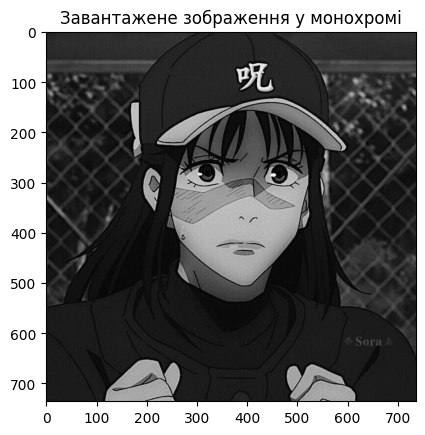

In [6]:
# ініціалізація зображення
img = load_image(0)
show_image(img, 'Завантажене зображення у монохромі')

`2.` Визначити межі зображення методами `Собеля`, `Прюітта`,
`Робертса`, та за допомогою оператора `Лапласіана`. Навести
результати роботи.

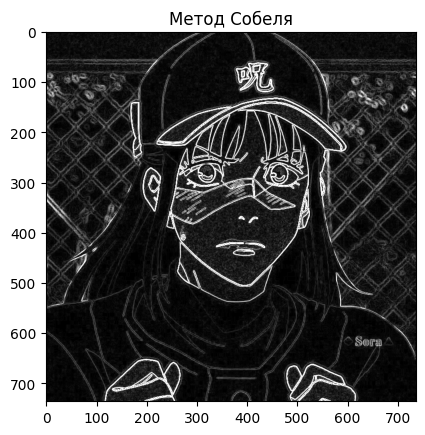

In [7]:
# Метод Собеля

# виділяємо горизонтальні границі
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
# виділяємо вертикальні границі
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
# Комбінуємо результати горизонтального та вертикального операторів Собеля
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
# Перетворюємо значення в беззнакові цілі числа для відображення
sobel_combined_abs = cv2.convertScaleAbs(sobel_combined)

show_method_result(sobel_combined_abs,'Метод Собеля')

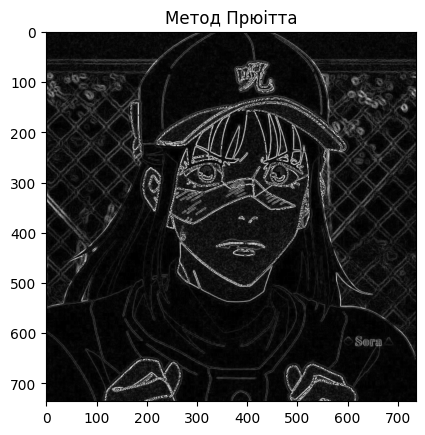

In [8]:
# Метод Прюітта

# Визначаємо ядро для горизонтального напрямку Прюїтта
matrix_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
# Визначаємо ядро для вертикального  напрямку Прюїтта
matrix_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
# Застосовуємо фільтр Прюїтта для горизонтального напрямку
prewitt_x = cv2.filter2D(img, cv2.CV_64F, matrix_prewitt_x)
# Застосовуємо фільтр Прюїтта для вертикального напрямку
prewitt_y = cv2.filter2D(img, cv2.CV_64F, matrix_prewitt_y)
# Комбінуємо результати горизонтального та вертикального фільтрів Прюїтта
prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)
# Перетворюємо значення в беззнакові цілі числа для відображення
prewitt_combined_int = np.uint8(prewitt_combined)

show_method_result(prewitt_combined_int,'Метод Прюітта')

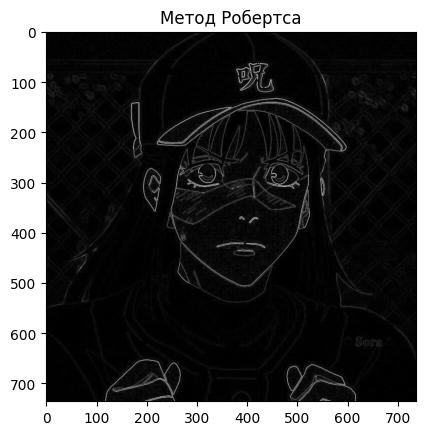

In [9]:
# Метод Робертса

# Ядро горизонтального напрямку
matrix_roberts_x = np.array([[0, -1], [1, 0]])
# Ядро вертикального  напрямку
matrix_roberts_y = np.array([[-1, 0], [0, 1]])
# Застосовуємо фільтр Робертса для горизонтального напрямку
roberts_x = cv2.filter2D(img, cv2.CV_64F, matrix_roberts_x)
# Застосовуємо фільтр Робертса для вертикального напрямку
roberts_y = cv2.filter2D(img, cv2.CV_64F, matrix_roberts_y)
# Комбінуємо результати горизонтального та вертикального фільтрів Робертса
roberts_combined = np.sqrt(roberts_x**2 + roberts_y**2)
# Перетворюємо значення в беззнакові цілі числа для відображення
roberts_combined_int = np.uint8(roberts_combined)

show_method_result(roberts_combined_int,'Метод Робертса')


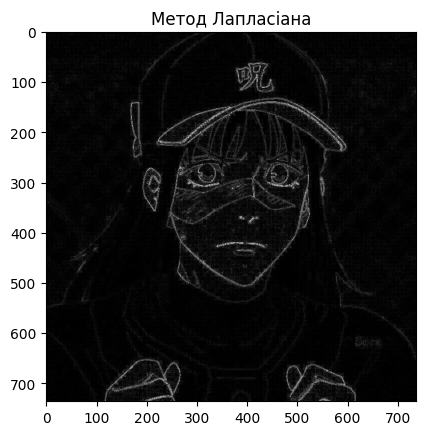

In [10]:
# Метод Лапласіана

# Застосовуємо оператор Лапласіана до зображення
laplacian = cv2.Laplacian(img, cv2.CV_64F)
# Перетворюємо значення в беззнакові цілі числа та обираємо їх абсолютне значення для відображення
laplacian_int = np.uint8(np.abs(laplacian))

show_method_result(laplacian_int,'Метод Лапласіана')

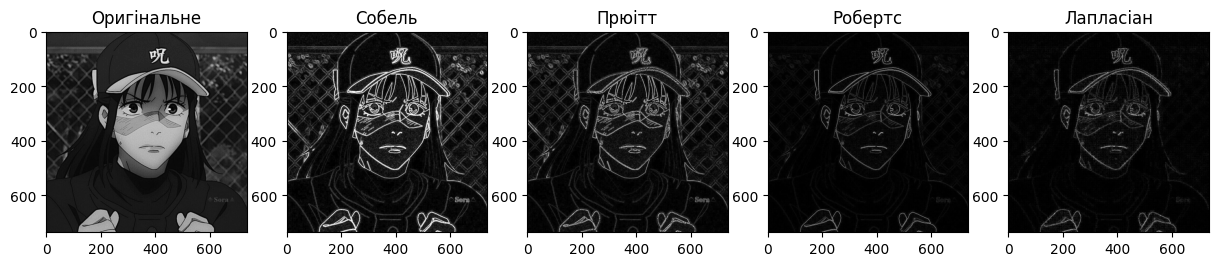

In [11]:
# вивід всіх зображень одразу

plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1), plt.imshow(img, cmap='gray'), plt.title('Оригінальне')
plt.subplot(1, 5, 2), plt.imshow(sobel_combined_abs, cmap='gray'), plt.title('Собель')
plt.subplot(1, 5, 3), plt.imshow(prewitt_combined_int, cmap='gray'), plt.title('Прюітт')
plt.subplot(1, 5, 4), plt.imshow(roberts_combined_int, cmap='gray'), plt.title('Робертс')
plt.subplot(1, 5, 5), plt.imshow(laplacian_int, cmap='gray'), plt.title('Лапласіан')
plt.show()

`3.` Визначити межі зображення `методом Кенні` досліджуючи різні
значення `σ` та параметри `гістерезису`. Відобразити результати.

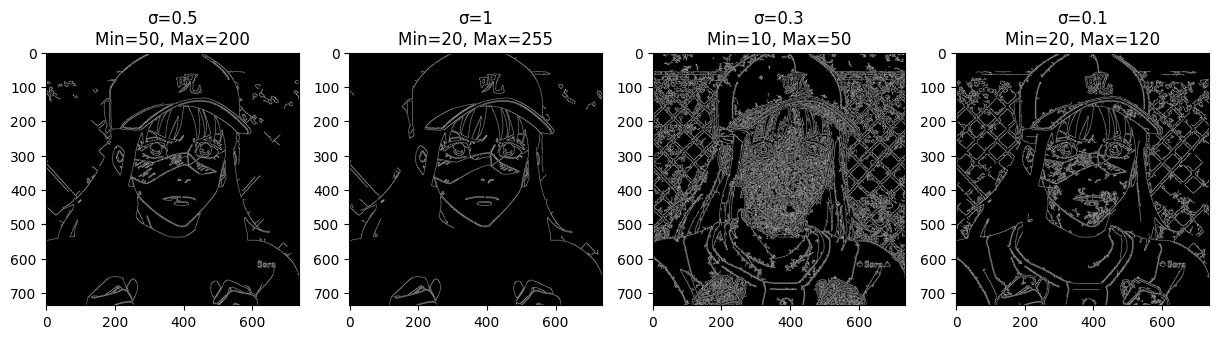

In [12]:
# Метод Кенні з різними парметрами σ та гістерезису
plt.figure(figsize=(15, 5))

kenny_method(img, 0.5, 50, 200, 1)
kenny_method(img, 1, 20, 255, 2)
kenny_method(img, 0.3, 10, 50, 3)
kenny_method(img, 0.1, 20, 120, 4)

plt.show()

`4.` Отримані зображення оцінити візуально. Кожне зображення
повинно отримати оцінку `від 1 до 10`, що визначає якість
виділення меж.

- `Собель`: оцінка 10
- `Пріюітт`: оцінка 8
- `Робертс`: оцінка 5
- `Лапласіан`: оцінка 5

- `Кенні`: оцінка залежить від параметрів